In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/macbookair/Downloads/UserData (2).csv'
df = pd.read_csv(file_path)

df.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",NaN,India,NaN,2022-10-14T17:13:36.303Z,NaN,NaN,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",NaN,Albania,NaN,2023-06-06T12:29:01.772Z,NaN,NaN,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [3]:
# Printing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreferredSponsors  27562 non-null  object
 1   Gender             18027 non-null  object
 2   Country            27500 non-null  object
 3   Degree             16750 non-null  object
 4   Sign Up Date       27562 non-null  object
 5   city               18028 non-null  object
 6   zip                18018 non-null  object
 7   isFromSocialMedia  27553 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [4]:
# check the number of missing data
df.isnull().sum()

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9534
zip                   9544
isFromSocialMedia        9
dtype: int64

In [5]:
# 
df['Gender'].value_counts()

Gender
Male                     11027
Female                    6910
Don't want to specify       75
Other                       15
Name: count, dtype: int64

In [6]:
# max_gender = df['Gender'].value_counts().idxmax()
# max_gender

In [7]:
max_country = df['Country'].value_counts().idxmax()
print(max_country)

India


In [8]:
df['Country'].replace(np.nan, max_country, inplace=True)

/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_7090/48949995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace(np.nan, max_country, inplace=True)


In [9]:
count_country= df['Country'].value_counts().sum()
print("Total number of countries:", count_country)

Total number of countries: 27562


### To handle missing values in the Gender column, we filled them using the mode of each country, as some countries may have a higher population of one gender compared to others

Use the pattern in writting the report. when you see the type of code below 

In [65]:
# Fill missing Gender values based on the mode within each country
df['Gender'] = df.groupby('Country')['Gender'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Don't want to specify")
)

In [11]:
df['Gender'].value_counts()

Gender
Male                     19952
Female                    7455
Don't want to specify      140
Other                       15
Name: count, dtype: int64

## SAME PATTERN GOES TO THE REST I USED THE SAME CODE FOR. 

### **Similar to Degree**, we cleaned the data by filling the missing values with the most frequent degree for each country

In [12]:
df['Degree'].value_counts()

Degree
Undergraduate Student       6527
Graduate Program Student    6015
Not in Education            2646
High School Student         1562
Name: count, dtype: int64

In [13]:
# Fill missing Degree values based on the mode within each country
df['Degree'] = df.groupby('Country')['Degree'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Not in Education")
)

In [14]:
df['Degree'].value_counts()

Degree
Undergraduate Student       13914
Graduate Program Student     9069
Not in Education             2871
High School Student          1708
Name: count, dtype: int64

In [15]:
df.isnull().sum()

PreferredSponsors       0
Gender                  0
Country                 0
Degree                  0
Sign Up Date            0
city                 9534
zip                  9544
isFromSocialMedia       9
dtype: int64

In [16]:
## Confused about this.

df['city'] = df.groupby('Country')['city'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)


/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_7090/4118682458.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)


In [17]:
df.isnull().sum()

PreferredSponsors       0
Gender                  0
Country                 0
Degree                  0
Sign Up Date            0
city                   63
zip                  9544
isFromSocialMedia       9
dtype: int64

In [18]:
mask_df = df['city'].isna()
df[mask_df].head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
273,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Don't want to specify,Cuba,Not in Education,2023-08-07T21:46:21.606Z,NaN,NaN,True
916,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Don't want to specify,Chile,Not in Education,2023-09-01T17:00:10.718Z,NaN,NaN,True
1024,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Don't want to specify,Equatorial Guinea,Not in Education,2023-09-27T07:51:44.446Z,NaN,NaN,True
1330,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Don't want to specify,Bahrain,Not in Education,2023-08-24T04:43:41.994Z,NaN,NaN,True
1692,"[""Illinois Institute of Technology"",""Grant Tho...",Don't want to specify,Hong Kong,Not in Education,2022-11-06T13:32:11.053Z,NaN,NaN,False


In [ ]:
#drop missing rows in city because most of the rows are missing after doing most of the cleaning
df.dropna(subset = ['city'], inplace=True) 

In [20]:
df['zip'] = df.groupby('city')['zip'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)


/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_7090/1458683160.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)


In [21]:
df.isna().sum()

PreferredSponsors    0
Gender               0
Country              0
Degree               0
Sign Up Date         0
city                 0
zip                  5
isFromSocialMedia    8
dtype: int64

In [ ]:
# Viewing the number of missing cells  in zip column
mask_df = df['zip'].isna()
df[mask_df]

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
13120,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Uganda,Undergraduate Student,2023-06-16T04:20:02.245Z,Mbarara,NaN,True
21222,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Vietnam,Undergraduate Student,2023-06-15T03:36:02.537Z,HoChiMinh,NaN,True
22396,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Nigeria,Undergraduate Student,2023-07-27T11:18:42.727Z,kawo,NaN,True
23083,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Undergraduate Student,2023-08-14T11:54:13.167Z,Golf city,NaN,True
25519,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Ethiopia,Graduate Program Student,2023-04-29T12:31:29.256Z,Bishoftu,NaN,False


In [23]:
# Fill missing zip values based on the mode within each country
df['zip'] = df.groupby('Country')['zip'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan
)

In [ ]:
max_social =  df['isFromSocialMedia'].value_counts().idxmax()
max_social

In [ ]:
#Fill the missing values by using the mode in max_social
df['isFromSocialMedia'].replace(np.nan, max_social, inplace=True)

/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_7090/4047748715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['isFromSocialMedia'].replace(np.nan, max_social, inplace=True)
/var/folders/0y/9xykymqn331_bmmdcljfdlyh0000gn/T/ipykernel_7090/4047748715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [26]:
df.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",Male,India,Undergraduate Student,2022-10-14T17:13:36.303Z,Hyderabad,500072,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Albania,Graduate Program Student,2023-06-06T12:29:01.772Z,Tirana,1001,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [27]:
df.head()



,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",Male,India,Undergraduate Student,2022-10-14T17:13:36.303Z,Hyderabad,500072,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Albania,Graduate Program Student,2023-06-06T12:29:01.772Z,Tirana,1001,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [28]:
df.isnull().sum()

PreferredSponsors    0
Gender               0
Country              0
Degree               0
Sign Up Date         0
city                 0
zip                  0
isFromSocialMedia    0
dtype: int64

In [ ]:
# Breaking up the timestamp to figeu

df['Sign Up Date'] = pd.to_datetime(df['Sign Up Date'])

df['day'] = df['Sign Up Date'].dt.day
df['month'] = df['Sign Up Date'].dt.month
df['year'] = df['Sign Up Date'].dt.year


print(df)

                                       PreferredSponsors  Gender  \
0      ["GlobalShala","Grant Thornton China","Saint L...    Male   
1      ["GlobalShala","Grant Thornton China","Saint L...    Male   
2      ["GlobalShala","Illinois Institute of Technolo...    Male   
3      ["GlobalShala","Grant Thornton China","Saint L...    Male   
4      ["GlobalShala","Grant Thornton China","Saint L...  Female   
...                                                  ...     ...   
27557  ["GlobalShala","Grant Thornton China","Saint L...  Female   
27558  ["GlobalShala","Saint Louis University","Illin...    Male   
27559  ["GlobalShala","Illinois Institute of Technolo...    Male   
27560  ["GlobalShala","Grant Thornton China","Saint L...    Male   
27561  ["GlobalShala","Grant Thornton China","Saint L...    Male   

             Country                    Degree  \
0            Nigeria     Undergraduate Student   
1              India     Undergraduate Student   
2              India     Undergra

In [30]:
df.drop('Sign Up Date', axis=1, inplace=True)

In [31]:
df.head()

,PreferredSponsors,Gender,Country,Degree,city,zip,isFromSocialMedia,day,month,year
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,Owerri,460103,False,23,7,2023
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,kottayam,686501,False,24,4,2023
2,"[""GlobalShala"",""Illinois Institute of Technolo...",Male,India,Undergraduate Student,Hyderabad,500072,False,14,10,2022
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Albania,Graduate Program Student,Tirana,1001,True,6,6,2023
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,Kumasi,AT-1214-9090,False,15,6,2023


In [32]:
df.dtypes

PreferredSponsors    object
Gender               object
Country              object
Degree               object
city                 object
zip                  object
isFromSocialMedia      bool
day                   int32
month                 int32
year                  int32
dtype: object

In [33]:
duplicated_df = df.duplicated()
duplicates  = df[duplicated_df]
print("There are",duplicates.shape[0], "rows in the dataset")


There are 6553 rows in the dataset


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape
print("After removing duplicates, there are", df.shape[0], "rows")

After removing duplicates, there are 20946 rows


In [37]:
# duplicated_df = df.duplicated()
# duplicates = df[df.duplicated_df]
# df.drop(duplicates, axis= 0, inplace=True)

In [39]:
print(df.shape)
df.head()

(20946, 10)


,PreferredSponsors,Gender,Country,Degree,city,zip,isFromSocialMedia,day,month,year
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,Owerri,460103,False,23,7,2023
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,kottayam,686501,False,24,4,2023
2,"[""GlobalShala"",""Illinois Institute of Technolo...",Male,India,Undergraduate Student,Hyderabad,500072,False,14,10,2022
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Albania,Graduate Program Student,Tirana,1001,True,6,6,2023
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,Kumasi,AT-1214-9090,False,15,6,2023


In [62]:
df['PreferredSponsors'].value_counts()

PreferredSponsors
["GlobalShala","Grant Thornton China","Saint Louis University","Illinois Institute of Technology","Excelerate"]    16255
["GlobalShala","Illinois Institute of Technology","Saint Louis University","Grant Thornton China","Excelerate"]     1442
["Illinois Institute of Technology","Grant Thornton China","Excelerate"]                                             962
["Saint Louis University"]                                                                                           557
["GlobalShala","Saint Louis University","Illinois Institute of Technology","Grant Thornton China","Excelerate"]      349
                                                                                                                   ...  
["Illinois Institute of Technology","Excelerate","Saint Louis University"]                                             1
["GlobalShala","Saint Louis University","Excelerate","Illinois Institute of Technology"]                               1
["Grant Thornt

## Visualization of charts

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
count_country = df['Country'].value_counts()

Country
India            8901
Nigeria          3434
United States    2941
Pakistan         1299
Ghana             852
                 ... 
Guatemala           1
Guam                1
Greece              1
Latvia              1
Serbia              1
Name: count, Length: 134, dtype: int64

In [57]:
#visualizing the gender chart

count_gender = df['Gender'].value_counts().reset_index()
count_gender.set_index(count_gender.columns[0], inplace=True)
count_gender

,count
Gender,
Male,13672
Female,7182
Don't want to specify,77
Other,15


<Axes: xlabel='Gender'>

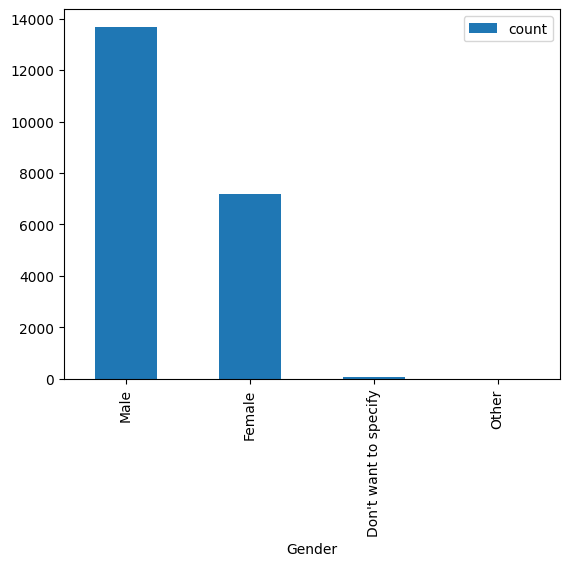

In [ ]:
#Visualizaing gender column
count_gender.plot(kind='bar')
plt.

In [64]:
df.to_csv('/Users/macbookair/workspace/Excelerate/CleanedUserData.csv')